## 1. Data Preprocessing

#### Importing Neccessary libraries

In [20]:
import pandas as pd
import numpy as np

#### Loading the Dataset

In [21]:
df=pd.read_csv("./train/train.csv")
np.random.seed(9208)
df=df.sample(n=10000)
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
333148,id1894858,2,2016-01-18 11:46:50,2016-01-18 11:51:21,1,-73.969109,40.761131,-73.978104,40.765034,N,271
1177120,id0955496,1,2016-06-11 13:23:36,2016-06-11 13:24:30,1,-73.960320,40.816296,-73.959023,40.815285,N,54
1337390,id3853446,2,2016-04-22 15:05:57,2016-04-22 15:36:07,1,-73.994217,40.751141,-73.983963,40.748661,N,1810
1343613,id1852549,1,2016-01-03 02:10:53,2016-01-03 02:35:37,1,-73.988708,40.727215,-73.818253,40.668213,N,1484
248295,id3138610,1,2016-03-10 16:59:27,2016-03-10 17:18:28,1,-73.980042,40.752285,-73.971024,40.788334,N,1141
...,...,...,...,...,...,...,...,...,...,...,...
250614,id1442604,2,2016-04-08 12:48:19,2016-04-08 12:58:05,5,-73.960693,40.765800,-73.971680,40.746391,N,586
729062,id3499534,2,2016-05-03 16:42:03,2016-05-03 16:49:32,2,-73.968132,40.762318,-73.959709,40.766895,N,449
1440062,id0454891,2,2016-06-08 04:46:40,2016-06-08 05:10:48,1,-73.949333,40.772858,-73.776443,40.646126,N,1448
1375044,id0161392,1,2016-01-05 07:01:23,2016-01-05 07:08:45,1,-73.970589,40.758419,-73.955627,40.764526,N,442


#### Calculating and Displaying the summary statistics

In [22]:
summary=df.describe()
summary

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.538100,1.639900,-73.973971,40.750799,-73.973633,40.751786,961.310900
std,0.498571,1.279372,0.039546,0.028729,0.034521,0.031966,3263.998576
min,1.000000,0.000000,-75.238327,39.923027,-74.183197,40.572983,2.000000
25%,1.000000,1.000000,-73.991959,40.737064,-73.991350,40.736198,396.000000
50%,2.000000,1.000000,-73.981937,40.754286,-73.979893,40.754734,660.000000
75%,2.000000,2.000000,-73.967453,40.767983,-73.963659,40.769357,1085.000000
max,2.000000,6.000000,-73.776596,40.865658,-73.422180,41.001583,86342.000000


#### Data Types of the feature columns

In [23]:
DataTypes=df.dtypes
DataTypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

#### Identify Missing or Erroneous Data

In [24]:
MissingData = df.isnull().sum()
MissingData

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

#### Converting categorical to Numerical Data

In [25]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['pickup_date'] = pd.to_datetime(df['pickup_datetime'].dt.date)
df['dropoff_date'] = pd.to_datetime(df['dropoff_datetime'].dt.date)
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_date           datetime64[ns]
dropoff_date          datetime64[ns]
dtype: object

#### Converting categorical data to numerical data for store_and_fwd_flag with the help of mapping

In [26]:
# Define mapping for the store_and_fwd_flag column
mapping = {'N': 0, 'Y': 1}
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map(mapping)
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,dropoff_date
333148,id1894858,2,2016-01-18 11:46:50,2016-01-18 11:51:21,1,-73.969109,40.761131,-73.978104,40.765034,0,271,2016-01-18,2016-01-18
1177120,id0955496,1,2016-06-11 13:23:36,2016-06-11 13:24:30,1,-73.960320,40.816296,-73.959023,40.815285,0,54,2016-06-11,2016-06-11
1337390,id3853446,2,2016-04-22 15:05:57,2016-04-22 15:36:07,1,-73.994217,40.751141,-73.983963,40.748661,0,1810,2016-04-22,2016-04-22
1343613,id1852549,1,2016-01-03 02:10:53,2016-01-03 02:35:37,1,-73.988708,40.727215,-73.818253,40.668213,0,1484,2016-01-03,2016-01-03
248295,id3138610,1,2016-03-10 16:59:27,2016-03-10 17:18:28,1,-73.980042,40.752285,-73.971024,40.788334,0,1141,2016-03-10,2016-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250614,id1442604,2,2016-04-08 12:48:19,2016-04-08 12:58:05,5,-73.960693,40.765800,-73.971680,40.746391,0,586,2016-04-08,2016-04-08
729062,id3499534,2,2016-05-03 16:42:03,2016-05-03 16:49:32,2,-73.968132,40.762318,-73.959709,40.766895,0,449,2016-05-03,2016-05-03
1440062,id0454891,2,2016-06-08 04:46:40,2016-06-08 05:10:48,1,-73.949333,40.772858,-73.776443,40.646126,0,1448,2016-06-08,2016-06-08
1375044,id0161392,1,2016-01-05 07:01:23,2016-01-05 07:08:45,1,-73.970589,40.758419,-73.955627,40.764526,0,442,2016-01-05,2016-01-05


#### Normalization (Min-Max scaling) on the following features pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, and trip_duration.

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_copy = df.copy()
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration']
df_copy[features] = scaler.fit_transform(df[features])
df_copy


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,dropoff_date
333148,id1894858,2,2016-01-18 11:46:50,2016-01-18 11:51:21,1,0.868298,0.889112,0.269499,0.448089,0,0.003116,2016-01-18,2016-01-18
1177120,id0955496,1,2016-06-11 13:23:36,2016-06-11 13:24:30,1,0.874311,0.947634,0.294572,0.565333,0,0.000602,2016-06-11,2016-06-11
1337390,id3853446,2,2016-04-22 15:05:57,2016-04-22 15:36:07,1,0.851121,0.878513,0.261800,0.409888,0,0.020940,2016-04-22,2016-04-22
1343613,id1852549,1,2016-01-03 02:10:53,2016-01-03 02:35:37,1,0.854890,0.853131,0.479548,0.222189,0,0.017165,2016-01-03,2016-01-03
248295,id3138610,1,2016-03-10 16:59:27,2016-03-10 17:18:28,1,0.860819,0.879727,0.278803,0.502452,0,0.013192,2016-03-10,2016-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250614,id1442604,2,2016-04-08 12:48:19,2016-04-08 12:58:05,5,0.874055,0.894065,0.277940,0.404593,0,0.006764,2016-04-08,2016-04-08
729062,id3499534,2,2016-05-03 16:42:03,2016-05-03 16:49:32,2,0.868966,0.890370,0.293670,0.452432,0,0.005177,2016-05-03,2016-05-03
1440062,id0454891,2,2016-06-08 04:46:40,2016-06-08 05:10:48,1,0.881827,0.901552,0.534487,0.170656,0,0.016748,2016-06-08,2016-06-08
1375044,id0161392,1,2016-01-05 07:01:23,2016-01-05 07:08:45,1,0.867286,0.886235,0.299034,0.446905,0,0.005096,2016-01-05,2016-01-05


#### standardization (Z-score scaling) on the following features pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, and trip_duration.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration']
df_copy[features] = scaler.fit_transform(df[features])
df_copy


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,dropoff_date
333148,id1894858,2,2016-01-18 11:46:50,2016-01-18 11:51:21,1,0.122956,0.359648,-0.129501,0.414462,0,-0.211503,2016-01-18,2016-01-18
1177120,id0955496,1,2016-06-11 13:23:36,2016-06-11 13:24:30,1,0.345218,2.279901,0.423260,1.986553,0,-0.277989,2016-06-11,2016-06-11
1337390,id3853446,2,2016-04-22 15:05:57,2016-04-22 15:36:07,1,-0.511998,0.011875,-0.299241,-0.097753,0,0.260028,2016-04-22,2016-04-22
1343613,id1852549,1,2016-01-03 02:10:53,2016-01-03 02:35:37,1,-0.372698,-0.820974,4.501224,-2.614555,0,0.160146,2016-01-03,2016-01-03
248295,id3138610,1,2016-03-10 16:59:27,2016-03-10 17:18:28,1,-0.153522,0.051711,0.075602,1.143403,0,0.055055,2016-03-10,2016-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250614,id1442604,2,2016-04-08 12:48:19,2016-04-08 12:58:05,5,0.335765,0.522181,0.056595,-0.168762,0,-0.114991,2016-04-08,2016-04-08
729062,id3499534,2,2016-05-03 16:42:03,2016-05-03 16:49:32,2,0.147652,0.400945,0.403369,0.472701,0,-0.156966,2016-05-03,2016-05-03
1440062,id0454891,2,2016-06-08 04:46:40,2016-06-08 05:10:48,1,0.623047,0.767839,5.712391,-3.305544,0,0.149116,2016-06-08,2016-06-08
1375044,id0161392,1,2016-01-05 07:01:23,2016-01-05 07:08:45,1,0.085526,0.265235,0.521612,0.398590,0,-0.159111,2016-01-05,2016-01-05


##### Outlier Detecttion and Removal Using Z-Score

In [29]:
from scipy import stats
Zscores = stats.zscore(df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']])
threshold = 2
df=df[(Zscores < threshold).all(axis=1)]
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,dropoff_date
333148,id1894858,2,2016-01-18 11:46:50,2016-01-18 11:51:21,1,-73.969109,40.761131,-73.978104,40.765034,0,271,2016-01-18,2016-01-18
1337390,id3853446,2,2016-04-22 15:05:57,2016-04-22 15:36:07,1,-73.994217,40.751141,-73.983963,40.748661,0,1810,2016-04-22,2016-04-22
248295,id3138610,1,2016-03-10 16:59:27,2016-03-10 17:18:28,1,-73.980042,40.752285,-73.971024,40.788334,0,1141,2016-03-10,2016-03-10
875505,id1535252,1,2016-02-01 15:18:26,2016-02-01 15:23:41,2,-73.957664,40.785217,-73.963440,40.777290,0,315,2016-02-01,2016-02-01
209494,id1163576,1,2016-02-07 17:02:54,2016-02-07 17:07:00,2,-73.992516,40.743385,-73.983246,40.749577,0,246,2016-02-07,2016-02-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
866626,id0134189,2,2016-04-05 07:42:15,2016-04-05 07:46:38,1,-73.996391,40.737953,-73.991440,40.745201,0,263,2016-04-05,2016-04-05
250614,id1442604,2,2016-04-08 12:48:19,2016-04-08 12:58:05,5,-73.960693,40.765800,-73.971680,40.746391,0,586,2016-04-08,2016-04-08
729062,id3499534,2,2016-05-03 16:42:03,2016-05-03 16:49:32,2,-73.968132,40.762318,-73.959709,40.766895,0,449,2016-05-03,2016-05-03
1375044,id0161392,1,2016-01-05 07:01:23,2016-01-05 07:08:45,1,-73.970589,40.758419,-73.955627,40.764526,0,442,2016-01-05,2016-01-05


## 2.Discovering Relationships

##### Correlation Analysis And Visualization

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
CorrelationMatrix = df.corr()
CorrelationMatrix 

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
vendor_id,1.000000,0.268036,0.013868,0.018061,0.003846,-0.012415,-0.076213,0.031537
passenger_count,0.268036,1.000000,-0.007686,-0.016799,0.010826,-0.025233,-0.011992,0.017776
pickup_longitude,0.013868,-0.007686,1.000000,0.685114,0.311580,0.281807,-0.013206,-0.038483
pickup_latitude,0.018061,-0.016799,0.685114,1.000000,0.231561,0.502908,-0.017893,-0.030411
dropoff_longitude,0.003846,0.010826,0.311580,0.231561,1.000000,0.458535,-0.000595,-0.000731
dropoff_latitude,-0.012415,-0.025233,0.281807,0.502908,0.458535,1.000000,-0.015192,-0.029613
store_and_fwd_flag,-0.076213,-0.011992,-0.013206,-0.017893,-0.000595,-0.015192,1.000000,-0.000830
trip_duration,0.031537,0.017776,-0.038483,-0.030411,-0.000731,-0.029613,-0.000830,1.000000


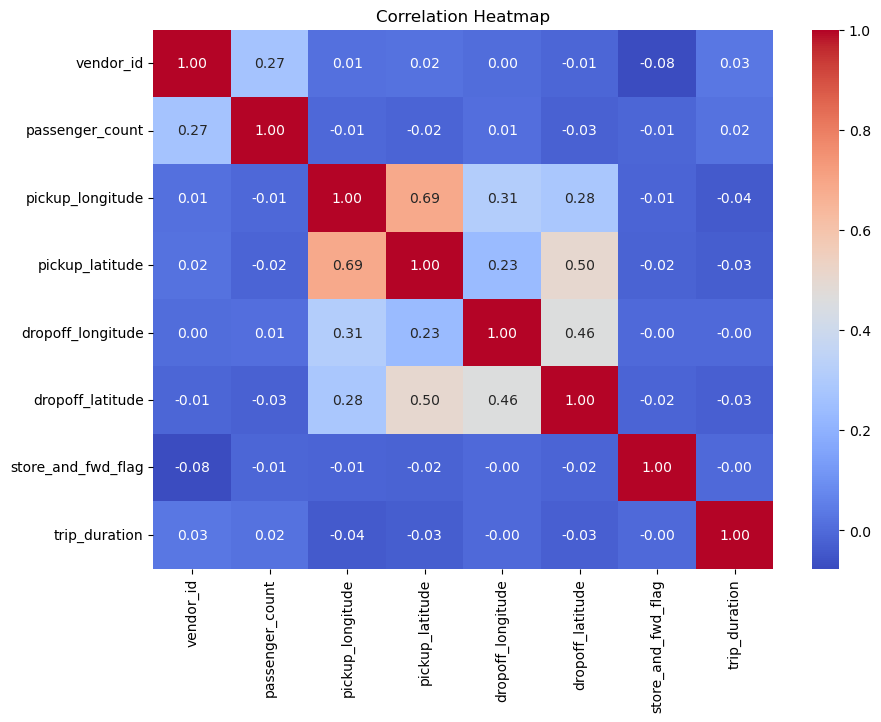

In [31]:
plt.figure(figsize=(10, 7))
sns.heatmap(CorrelationMatrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Regression analysis
statistical method used to identify significant predictors (independent variables) for a target variable (dependent variable)

In [32]:
import statsmodels.api as sm
columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'TripDuration']
NewDF = df[columns]
y = NewDF['TripDuration']
X = NewDF[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.810
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           0.000215
Time:                        20:32:34   Log-Likelihood:                -85671.
No. Observations:                9011   AIC:                         1.714e+05
Df Residuals:                    9005   BIC:                         1.714e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.994e+04   2.51e+05     -0.318      0.750   -5.72e+05    4.13e+05
pickup_longitude  -6768.1465   2275.729     -2.974      0.003   -1.12e+04   -2307.200
pickup_latitude    1648.5262   2250.318      0.733      0.464   -2762.609    6059.661
dropoff_longitude  4262.0899   2010.180      2.120      0.034     321.679    8202.500
dropoff_latitude  -4217.6194   1664.235     -2.534      0.011   -7479.899    -955.340
passenger_count      41.9782     26.830      1.565      0.118     -10.615      94.571
==============================================================================
Omnibus:                    21774.550   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        163661550.261
Skew:                          25.413   Prob(JB):                         0.00
Kurtosis:                     661.266   Cond. No.                     8.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Visualisations

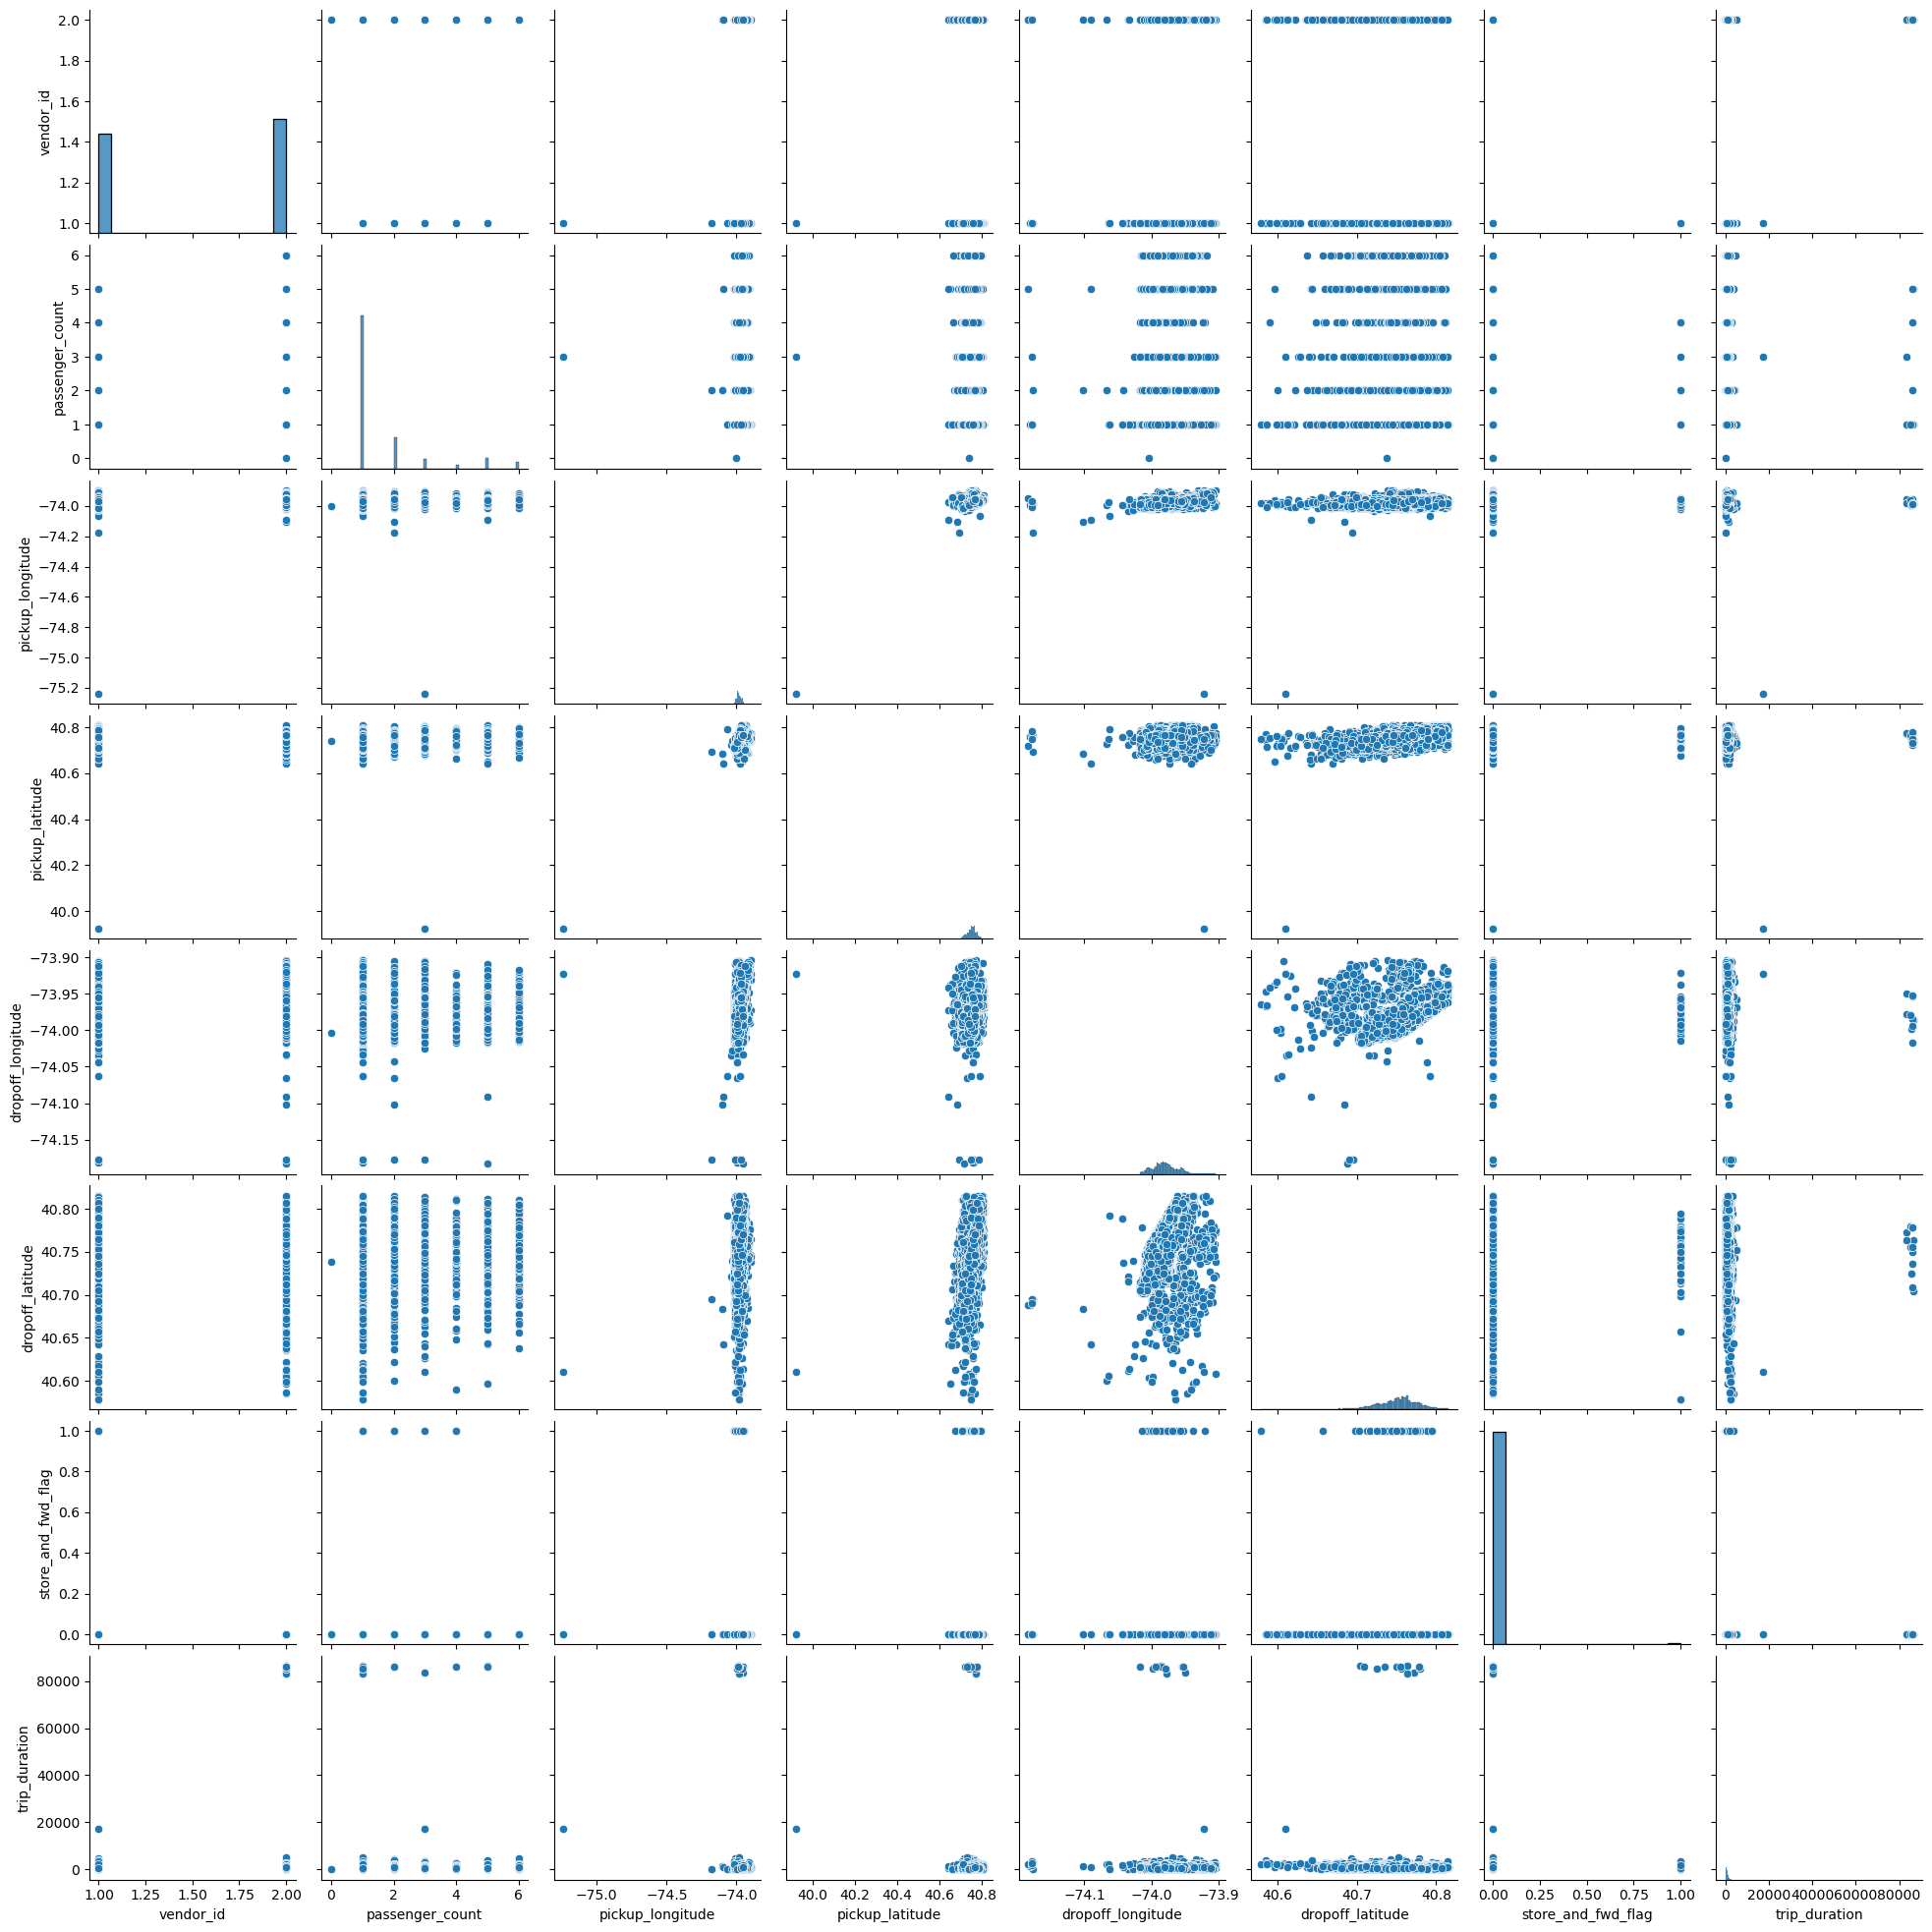

In [33]:
# Pairplot for numerical features
sns.pairplot(df[['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration']])
plt.show()

## 3. Data Visualizations

#### Scatter Plot: Passenger Count vs. Trip Duration
Understanding the relationship between the number of passengers and trip duration can help in predicting trip duration based on the passenger count. For instance, you may observe shorter trips when there are fewer passengers.

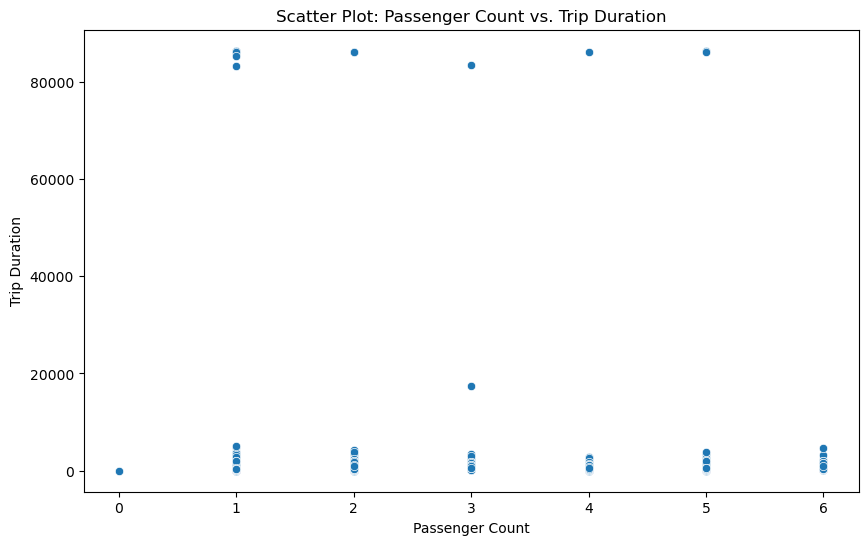

In [34]:
# Scatter Plot: Passenger Count vs. Trip Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='trip_duration', data=df)
plt.xlabel("Passenger Count")
plt.ylabel("Trip Duration")
plt.title("Scatter Plot: Passenger Count vs. Trip Duration")
plt.show()

##### Box Plot: Vendor ID vs. Trip Duration
Investigating the influence of the vendor on trip duration is useful for predicting trip durations more accurately. Different vendors may have different service levels or routes, leading to variations in trip duration.

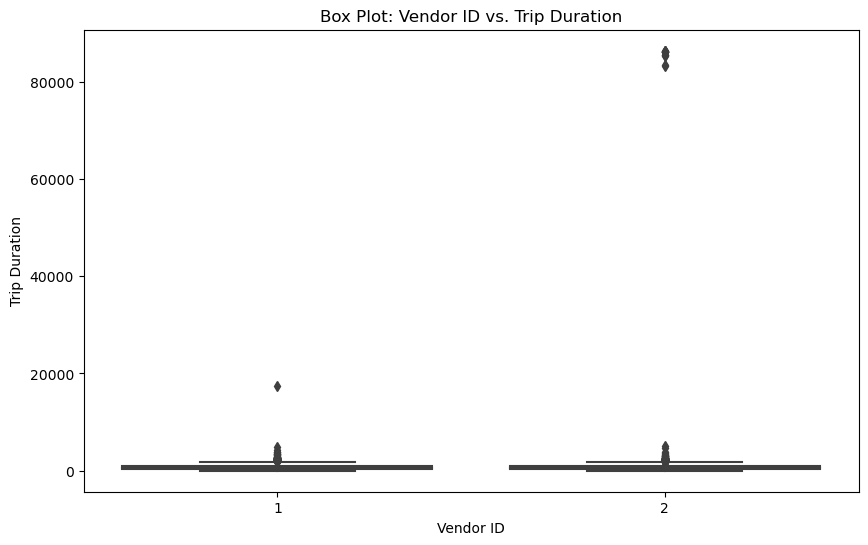

In [35]:
# Box Plot: Vendor ID vs. Trip Duration
plt.figure(figsize=(10, 6))
sns.boxplot(x='vendor_id', y='trip_duration', data=df)
plt.xlabel("Vendor ID")
plt.ylabel("Trip Duration")
plt.title("Box Plot: Vendor ID vs. Trip Duration")
plt.show()

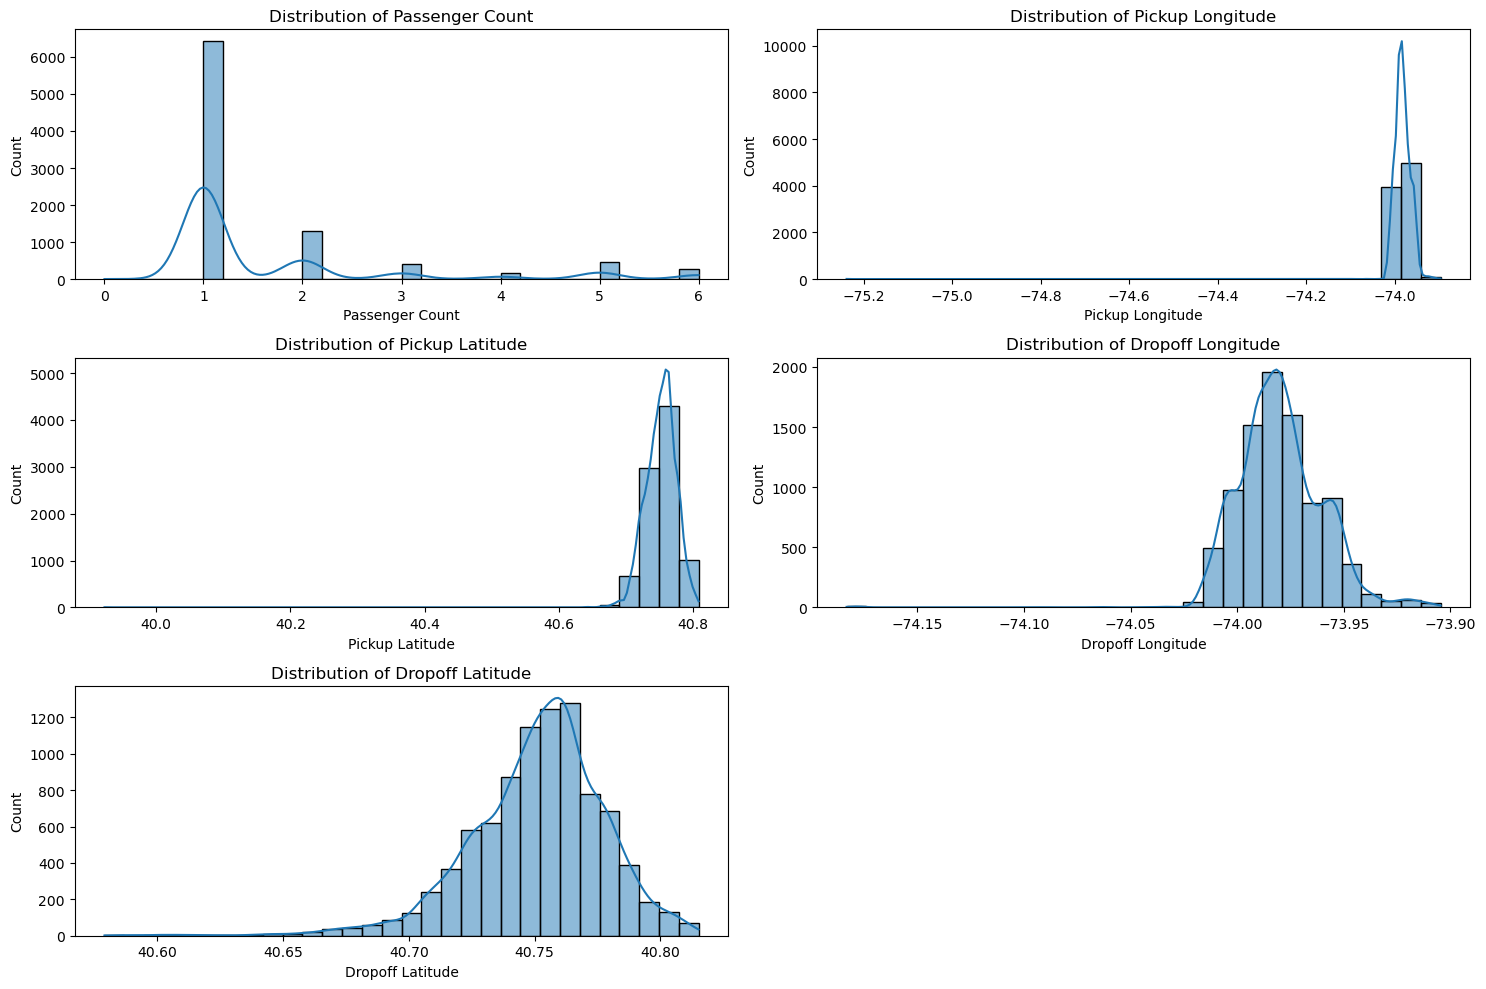

In [36]:
# Visualize the distribution of key features
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.histplot(df['passenger_count'], bins=30, kde=True)
plt.xlabel("Passenger Count")
plt.title("Distribution of Passenger Count")

plt.subplot(3, 2, 2)
sns.histplot(df['pickup_longitude'], bins=30, kde=True)
plt.xlabel("Pickup Longitude")
plt.title("Distribution of Pickup Longitude")

plt.subplot(3, 2, 3)
sns.histplot(df['pickup_latitude'], bins=30, kde=True)
plt.xlabel("Pickup Latitude")
plt.title("Distribution of Pickup Latitude")

plt.subplot(3, 2, 4)
sns.histplot(df['dropoff_longitude'], bins=30, kde=True)
plt.xlabel("Dropoff Longitude")
plt.title("Distribution of Dropoff Longitude")

plt.subplot(3, 2, 5)
sns.histplot(df['dropoff_latitude'], bins=30, kde=True)
plt.xlabel("Dropoff Latitude")
plt.title("Distribution of Dropoff Latitude")

plt.tight_layout()
plt.show()

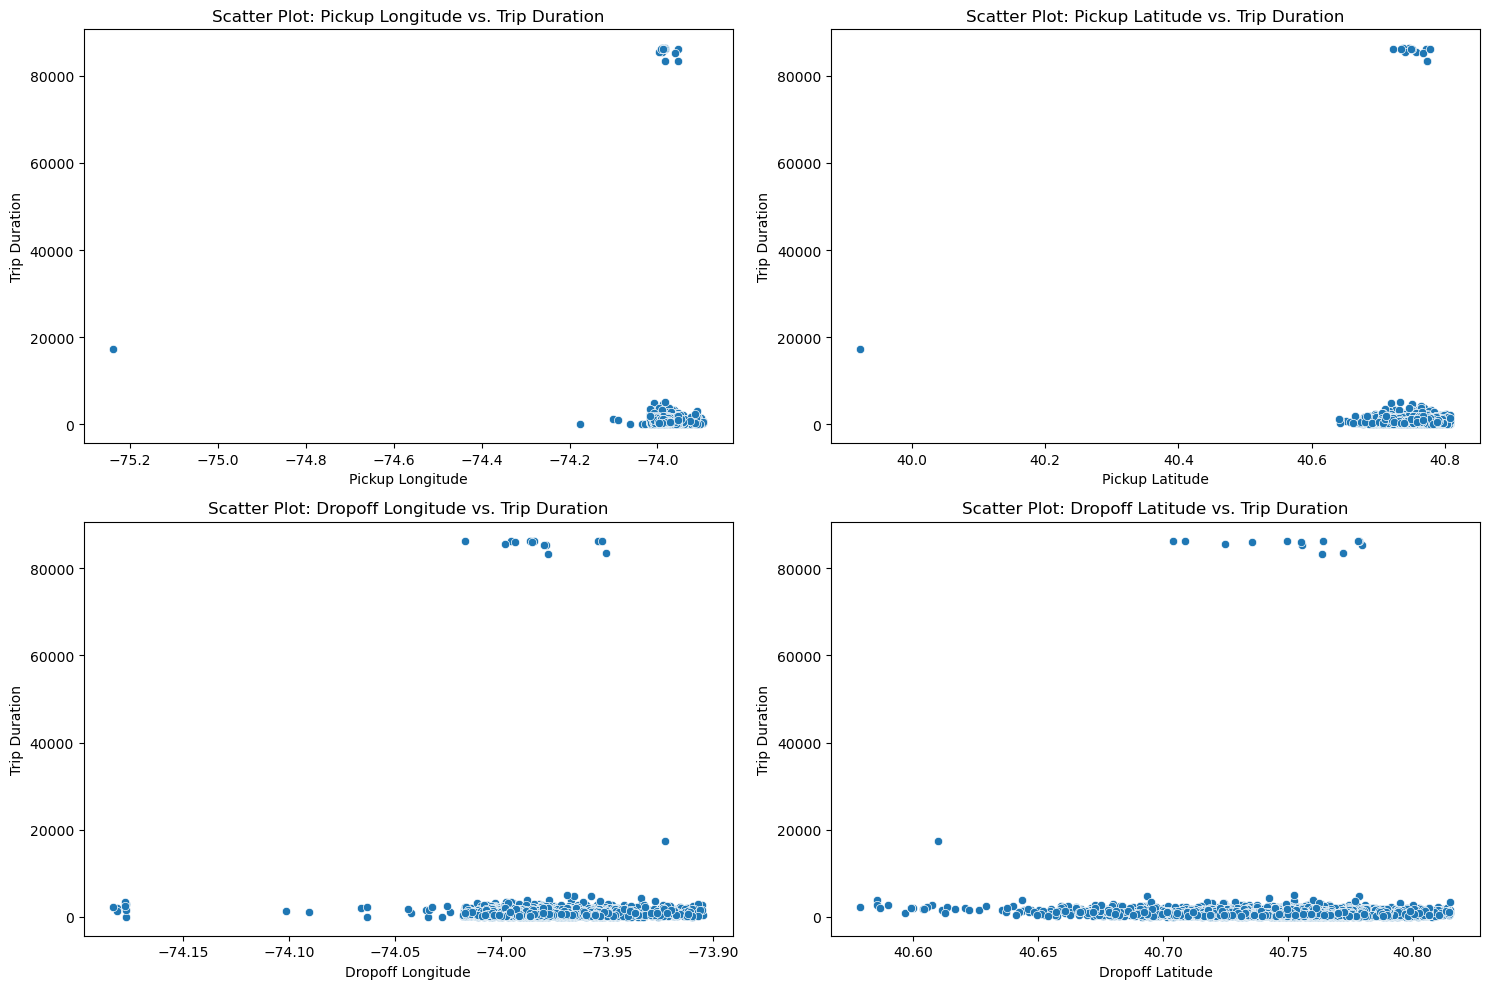

In [37]:
# Visualize the relationship between features and trip duration
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='pickup_longitude', y='trip_duration', data=df)
plt.xlabel("Pickup Longitude")
plt.ylabel("Trip Duration")
plt.title("Scatter Plot: Pickup Longitude vs. Trip Duration")

plt.subplot(2, 2, 2)
sns.scatterplot(x='pickup_latitude', y='trip_duration', data=df)
plt.xlabel("Pickup Latitude")
plt.ylabel("Trip Duration")
plt.title("Scatter Plot: Pickup Latitude vs. Trip Duration")

plt.subplot(2, 2, 3)
sns.scatterplot(x='dropoff_longitude', y='trip_duration', data=df)
plt.xlabel("Dropoff Longitude")
plt.ylabel("Trip Duration")
plt.title("Scatter Plot: Dropoff Longitude vs. Trip Duration")

plt.subplot(2, 2, 4)
sns.scatterplot(x='dropoff_latitude', y='trip_duration', data=df)
plt.xlabel("Dropoff Latitude")
plt.ylabel("Trip Duration")
plt.title("Scatter Plot: Dropoff Latitude vs. Trip Duration")

plt.tight_layout()
plt.show()


In [40]:
import folium
pickup_dropoff_map = folium.Map(location=[df['pickup_latitude'].mean(), df['pickup_longitude'].mean()], zoom_start=10)
pickup_locations = folium.FeatureGroup(name='Pickup Locations')
dropoff_locations = folium.FeatureGroup(name='Drop-off Locations')
for index, row in df.iterrows():
    pickup_location = [row['pickup_latitude'], row['pickup_longitude']]
    dropoff_location = [row['dropoff_latitude'], row['dropoff_longitude']]
    folium.CircleMarker(
        location=pickup_location,
        radius=5,
        color='blue',
        fill=True,
    ).add_to(pickup_locations)
    folium.CircleMarker(
        location=dropoff_location,
        radius=5,
        color='red',
        fill=True,
    ).add_to(dropoff_locations)
    folium.PolyLine([pickup_location, dropoff_location], color='green').add_to(pickup_dropoff_map)
pickup_locations.add_to(pickup_dropoff_map)
dropoff_locations.add_to(pickup_dropoff_map)
folium.LayerControl().add_to(pickup_dropoff_map)
pickup_dropoff_map.save('pickup_dropoff_locations_map.html')


## 4. Algorithm and Data Structure Efficiency

The dataset should be sorted and viewed in ascending order of trip duration. New data is added to the dataset frequently, where these new trips should show up at the end of the sorted list


Data Structure Choice: Linked List

Justification: A linked list allows for efficient insertion and deletion of elements while maintaining the sorted order. When new trips are added frequently, you can insert them into the linked list while preserving the ascending order of trip duration. The linked list's nodes contain references to the next and previous elements, making it easy to maintain the sorted order without having to shift large portions of data.


In [55]:
class Node:
    def __init__(self, TripDuration, data):
        self.TripDuration = TripDuration
        self.data = data
        self.next = None

class SortedLinkedList:
    def __init__(self):
        self.head = None

    def insert(self, TripDuration, data):
        new_node = Node(TripDuration, data)
        if not self.head or TripDuration <= self.head.TripDuration:
            new_node.next = self.head
            self.head = new_node
        else:
            current = self.head
            while current.next and current.next.TripDuration < TripDuration:
                current = current.next
            new_node.next = current.next
            current.next = new_node

    def display(self):
        current = self.head
        while current:
            print(f"Trip Duration: {current.TripDuration}, Data: {current.data}")
            current = current.next

# Example usage
details = SortedLinkedList()
details.insert(271, "Trip A")
details.insert(54, "Trip B")
details.insert(1810, "Trip C")

details.display()


Trip Duration: 54, Data: Trip B
Trip Duration: 271, Data: Trip A
Trip Duration: 1810, Data: Trip C


A new field is added to the data representing the passenger's phone numberIt will be used to quickly filter out the trips made by a specific passenger

For filtering out trips made by a specific passenger using a new field representing the passenger's phone number, a hash table (or dictionary in Python) is an excellent choice. 

In [54]:
class Trip:
    def __init__(self, TripDuration, data, PhoneNumber):
        self.TripDuration = TripDuration
        self.data = data
        self.PhoneNumber = PhoneNumber

class TripDataset:
    def __init__(self):
        self.trips = {}

    def AddTrip(self, TripDuration, data, PhoneNumber):
        new_trip = Trip(TripDuration, data, PhoneNumber)
        if PhoneNumber not in self.trips:
            self.trips[PhoneNumber] = []
        self.trips[PhoneNumber].append(new_trip)

    def GetTripsByPhone(self, PhoneNumber):
        if PhoneNumber in self.trips:
            return self.trips[PhoneNumber]
        else:
            return []

# Example
TripData = TripDataset()

TripData.AddTrip(271, "Trip A", "123-456-7890")
TripData.AddTrip(54, "Trip B", "987-654-3210")
TripData.AddTrip(1810, "Trip C", "123-456-7890")

# Get trips by a specific phone number
PhoneNumber = "123-456-7890"
trips = TripData.GetTripsByPhone(PhoneNumber)
print(f"the trips made by this specific phone number is/are:")
for trip in trips:
    print(f"Trip Duration: {trip.TripDuration}, Data: {trip.data}")


the trips made by this specific phone number is/are:
Trip Duration: 271, Data: Trip A
Trip Duration: 1810, Data: Trip C


## 5. Final Analysis

**Factors Impacting Trip Duration**

 1. **Distance and Route:** The distance between the pickup and dropoff locations plays a significant role in trip duration. The route chosen, traffic conditions, and road quality can also affect travel time.
 2. **Time of Day:** The time of day when the trip occurs can impact trip duration due to varying traffic patterns and congestion. Rush hours or late-night hours may result in longer trip times.
 3. **Passenger Count:** The number of passengers can affect the trip duration. Heavier loads may result in longer stops, more frequent stops, or a different type of vehicle.
 4. **Pickup and Dropoff Locations:** The specific neighborhoods or areas where the trip starts and ends can influence travel time. Urban areas with heavy traffic may lead to longer durations.
 5. **Vendor and Driver:** Different vendors or drivers may have varying driving habits, vehicle conditions, and familiarity with routes, affecting trip durations.
 6. **Store and Forward Flag:** The store_and_fwd_flag may indicate whether the trip data was stored in the vehicle before forwarding. Handling this flag appropriately may impact trip duration.


**Recommendations for Optimizing Trip Duration**

 1. **Optimize Routing:** Utilize navigation and route optimization tools to choose the most efficient routes based on real-time traffic conditions. Consider dynamic routing to avoid congestion.
    
2.  **Predictive Analytics:** Develop predictive models to estimate trip duration based on historical data, including time of day, day of the week, and location. This can help in setting realistic expectations for customers.
    
3.  **Dynamic Pricing:** Implement dynamic pricing to incentivize passengers to travel during off-peak hours, potentially reducing congestion and trip durations.
    
4.  **Driver Training:** Provide drivers with training and guidelines for efficient driving and route selection. Encourage them to avoid sudden stops and starts, which can impact trip duration.
    
5.  **Vehicle Maintenance:** Ensure that vehicles are well-maintained, reducing the likelihood of breakdowns that could result in extended trip durations.
    
6.  **Feedback Loop:** Establish a feedback loop with drivers and passengers to gather information on trip experiences. Use this data to continuously improve service and optimize trip durations.
    
7.  **Capacity Planning:** Assess passenger demand by time of day and location to allocate resources efficiently. Have additional vehicles available during peak hours to reduce waiting times.
    
8.  **Customer Communication:** Communicate expected trip durations to passengers, and provide real-time updates if there are delays due to unexpected circumstances.
    
9.  **Surge Pricing Strategy:** Implement surge pricing strategies during high-demand periods to manage supply and demand effectively and balance trip durations.
    
10.  **Data Analysis:** Continuously analyze trip data to identify patterns, trends, and areas for improvement. Use statistical and machine learning techniques to gain insights into trip duration factors.
